In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
order_products_train_df = pd.read_csv("order_products__train.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")



In [3]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [4]:
order_products_train_df.tail()

,order_id,product_id,add_to_cart_order,reordered
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
1384616,3421070,4724,3,1


In [5]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
orders_df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [7]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
orders_df.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [9]:
order_products_train_df.order_id.dtypes

dtype('int64')

In [10]:
orders_df.loc[orders_df.order_id==2]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3355525,2,202279,prior,3,5,9,8.0


In [11]:
order_products_prior_df.shape

(32434489, 4)

In [12]:
len(order_products_prior_df.order_id.unique())

3214874

In [13]:
cnt_srs = orders_df.eval_set.value_counts()

In [14]:
cnt_srs.index

Index([u'prior', u'train', u'test'], dtype='object')

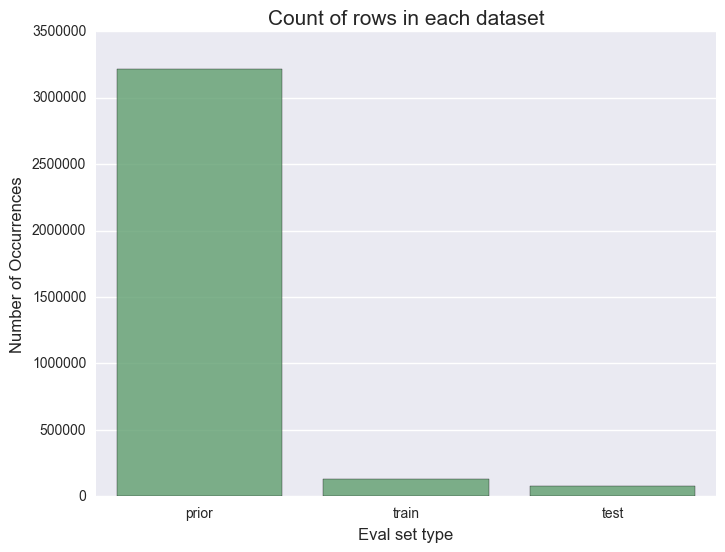

In [15]:
plt.figure(figsize = (8,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
#plt.xticks(rotation='vertical')
plt.show()

In [16]:
def get_unique_count(x):
    return len(np.unique(x))

In [17]:
cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [18]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
5,6,4
6,7,21
7,8,4
8,9,4
9,10,6


In [19]:
cnt_srs = cnt_srs.order_number.value_counts()

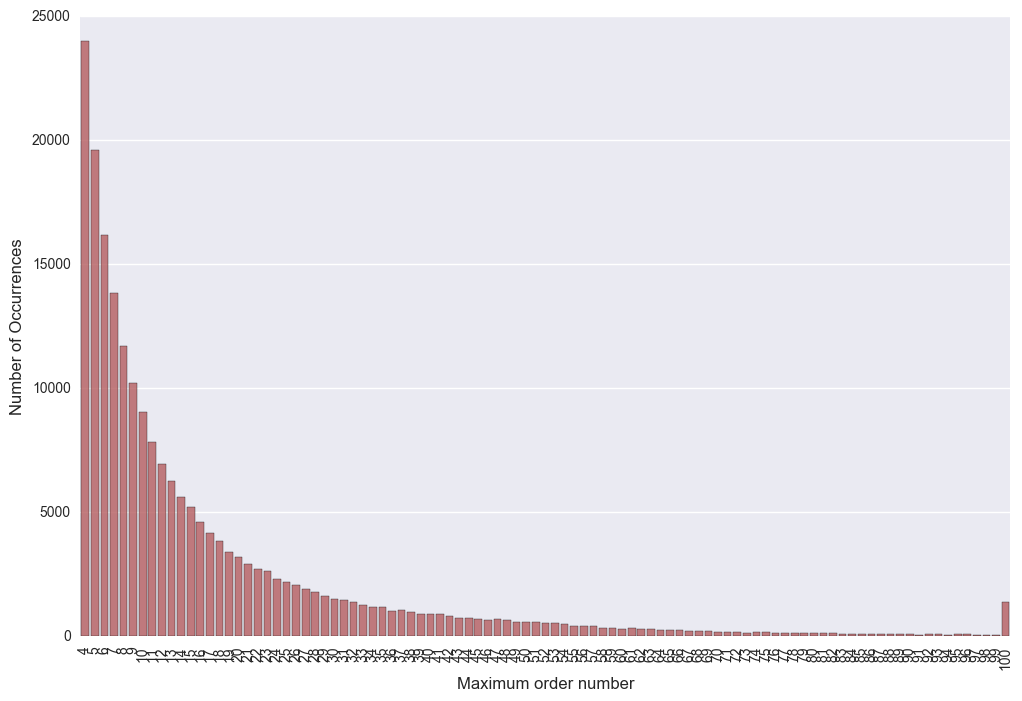

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [21]:
cns = orders_df.order_dow.value_counts()

In [22]:
cns

0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64

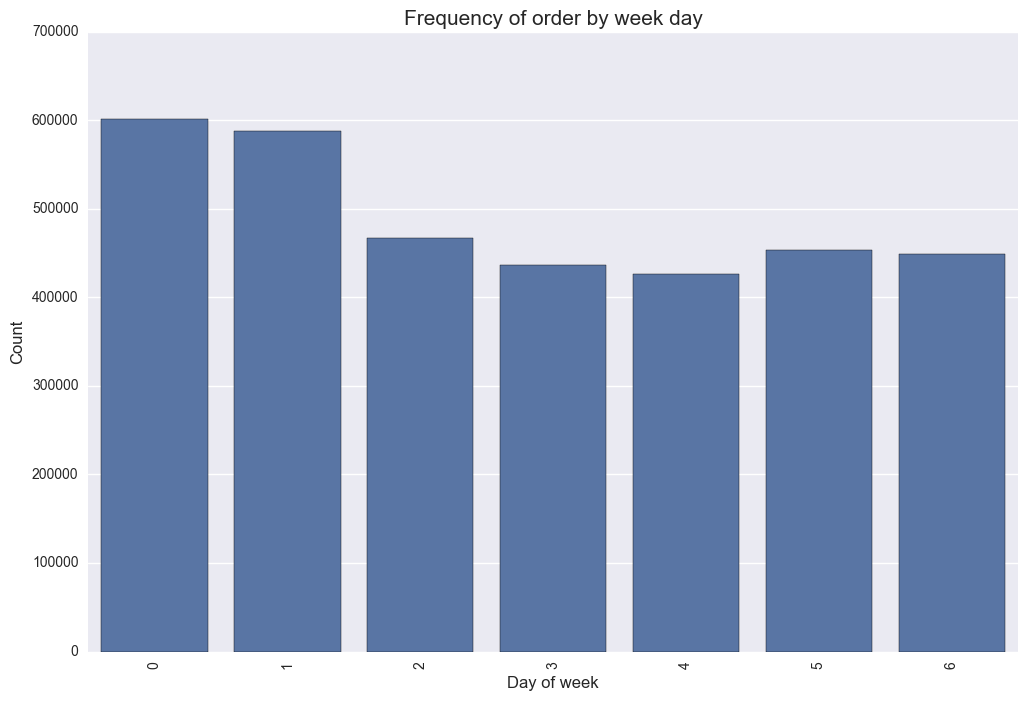

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

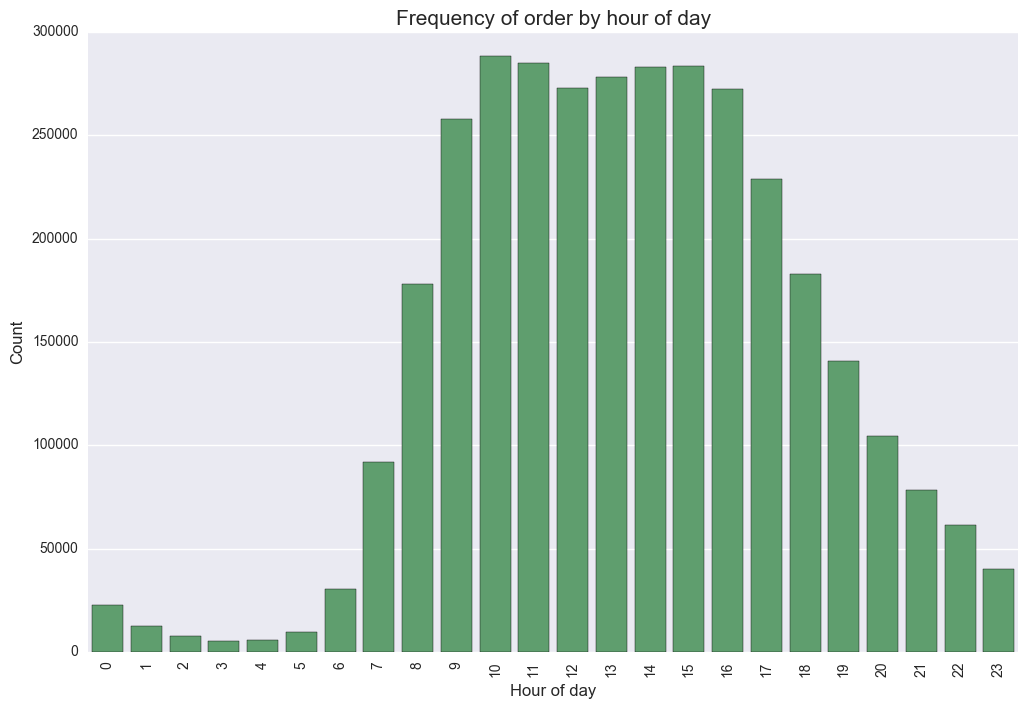

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

In [25]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()

In [26]:
grouped_df

,order_dow,order_hour_of_day,order_number
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813
5,0,5,1168
6,0,6,3329
7,0,7,12410
8,0,8,28108
9,0,9,40798


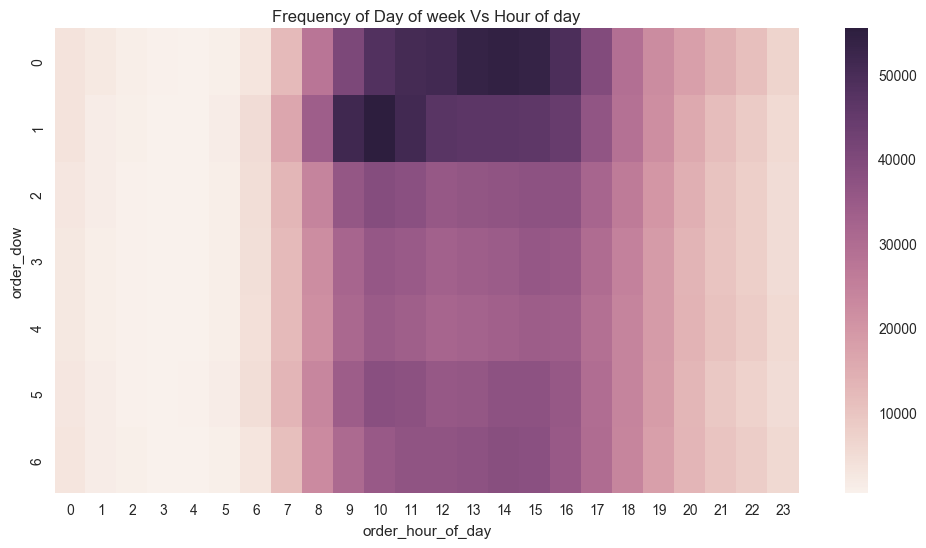

In [27]:
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

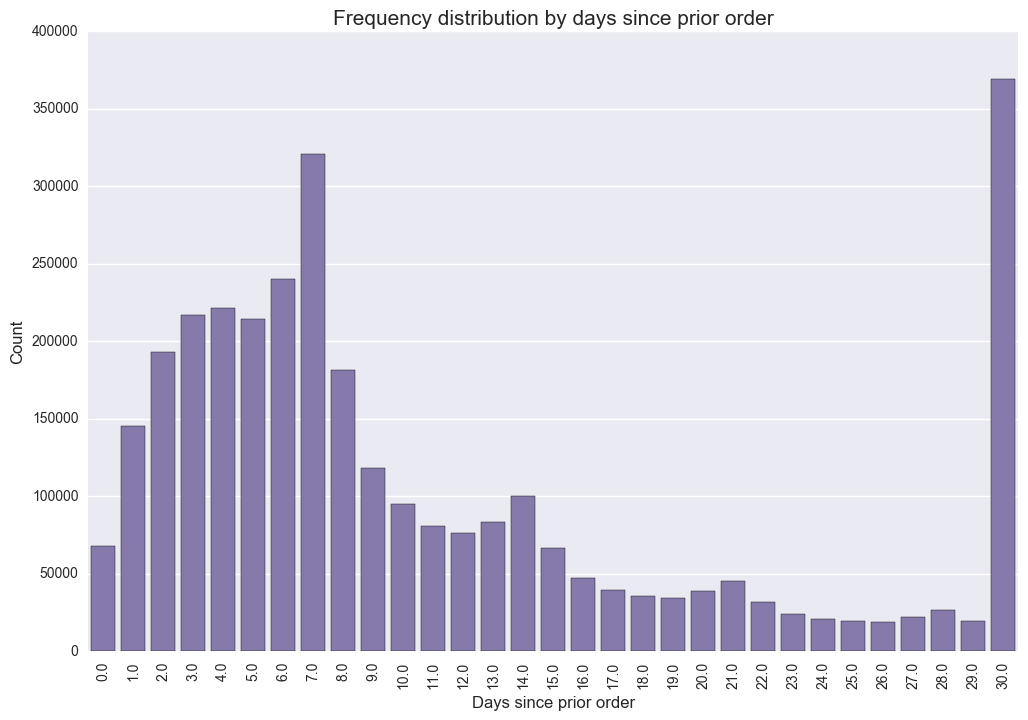

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [30]:
from __future__ import division

In [31]:
# percentage of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.5896974667922161

In [32]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

0.5985944127509629

In [33]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [34]:
 grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate(np.sum)

In [38]:
grouped_df = grouped_df.reset_index()

In [39]:
grouped_df.head()

,order_id,reordered
0,2,6
1,3,8
2,4,12
3,5,21
4,6,0


In [40]:
grouped_df["reordered"].ix[grouped_df.reordered>=1]=1

In [41]:
grouped_df.head()

,order_id,reordered
0,2,1
1,3,1
2,4,1
3,5,1
4,6,0


In [42]:
grouped_df.reordered.value_counts()

1    2826361
0     388513
Name: reordered, dtype: int64

In [44]:
len(grouped_df[grouped_df.reordered==1])

2826361

In [46]:
grouped_df.reordered.value_counts().reset_index()

,index,reordered
0,1,2826361
1,0,388513


In [47]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].ix[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

1    0.93444
0    0.06556
Name: reordered, dtype: float64

In [50]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate(max).reset_index()

In [51]:
grouped_df.head()

,order_id,add_to_cart_order
0,1,8
1,36,8
2,38,9
3,96,7
4,98,49


In [52]:
cnt_srs = grouped_df.add_to_cart_order.value_counts()

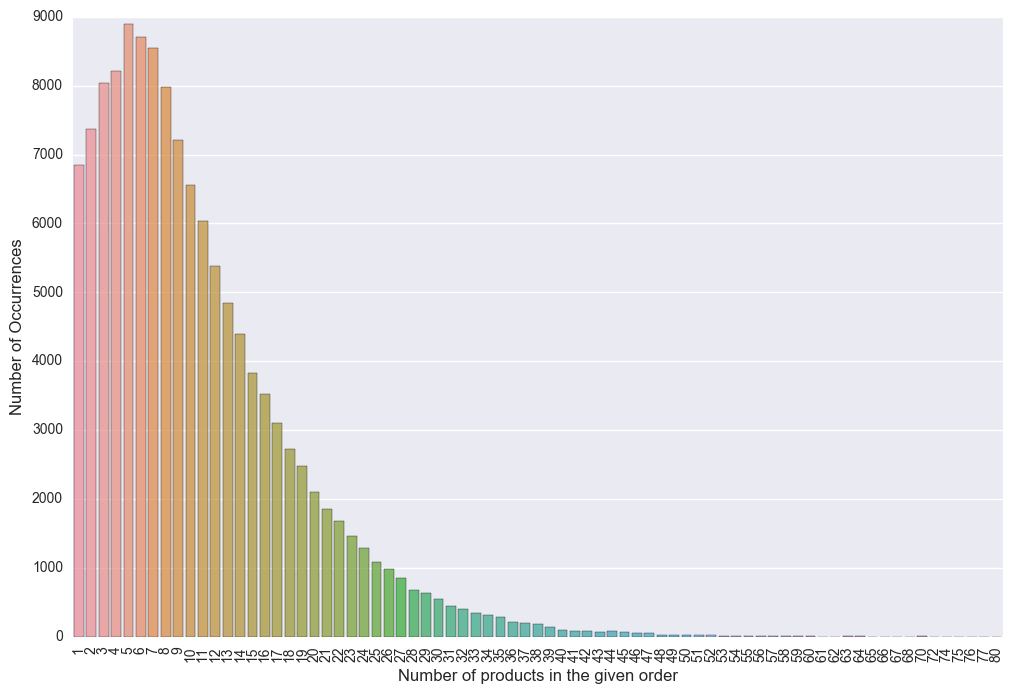

In [53]:
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [54]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [55]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [4]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index()

In [5]:
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs.head(40)

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


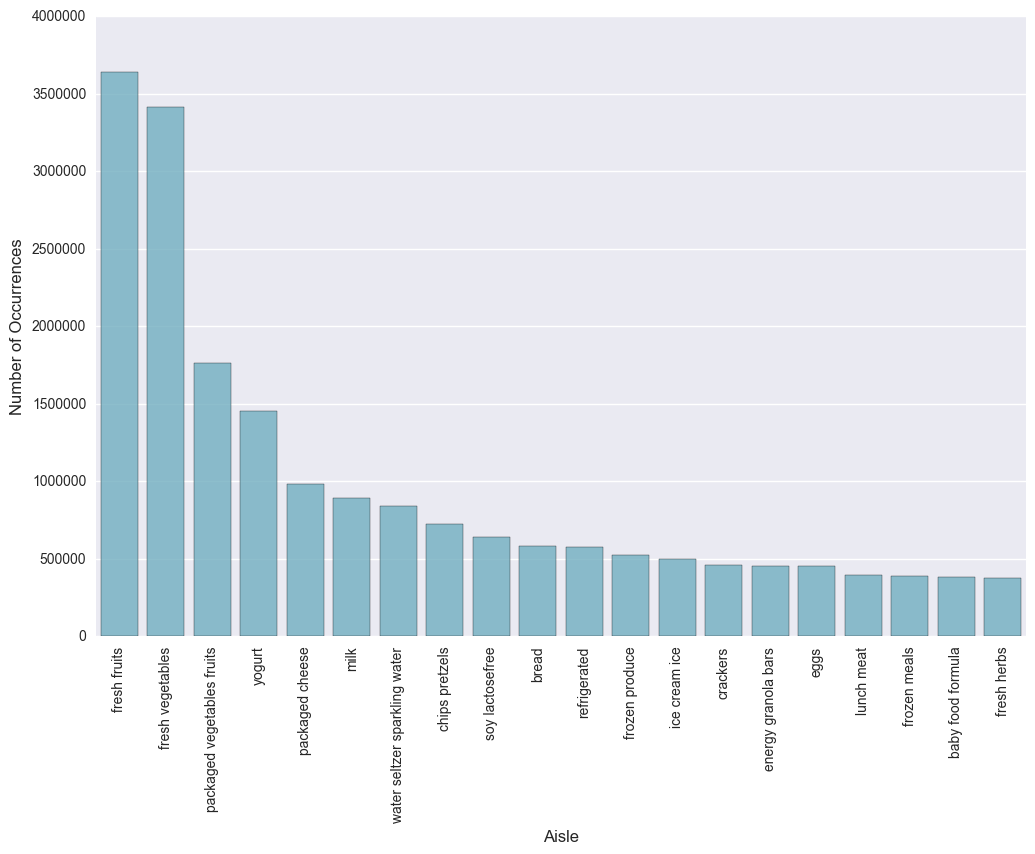

In [65]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [67]:

temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
temp_series

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [68]:
labels

array(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen', 'pantry',
       'bakery', 'canned goods', 'deli', 'dry goods pasta', 'household',
       'breakfast', 'meat seafood', 'personal care', 'babies',
       'international', 'alcohol', 'pets', 'missing', 'other', 'bulk'], dtype=object)

In [71]:
temp_series = np.array(temp_series)

In [72]:
temp_series

array([9479291, 5414016, 2887550, 2690129, 2236432, 1875577, 1176787,
       1068058, 1051249,  866627,  738666,  709569,  708931,  447123,
        423802,  269253,  153696,   97724,   69145,   36291,   34573])

In [73]:
temp_series.sum()

32434489

In [74]:
temp_series = temp_series/temp_series.sum()

In [76]:
sizes = temp_series*100

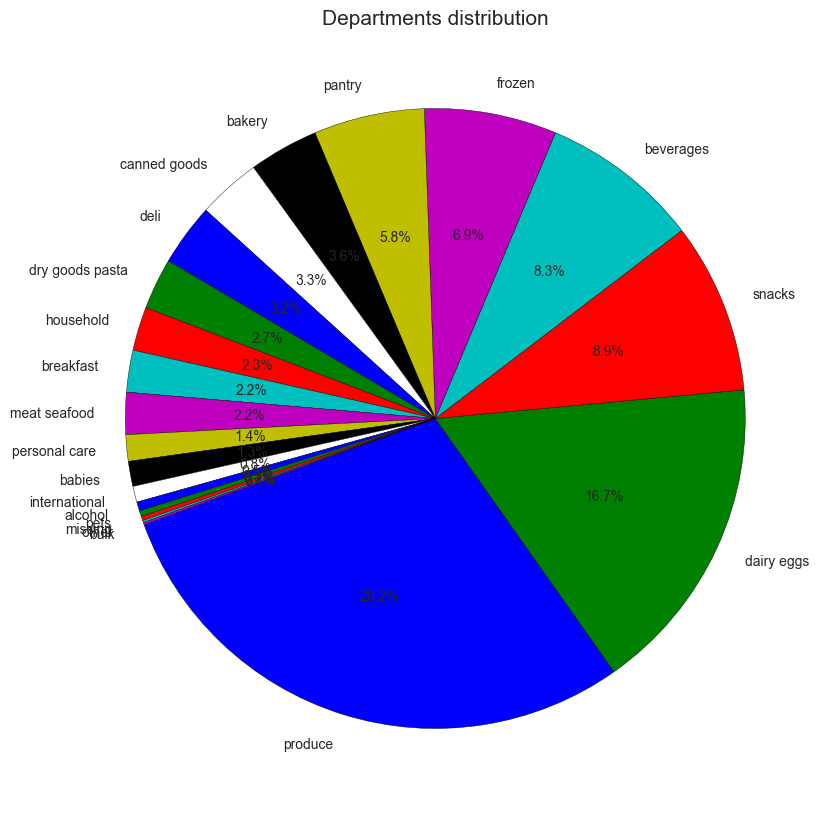

In [81]:
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

In [110]:
grouped_df = order_products_prior_df.groupby(["department","reordered"])["order_id"].aggregate("count").reset_index()

In [111]:
grouped_df.rename(columns={"order_id":"frequency"},inplace=True) 

In [112]:
grouped_df.head()

,department,reordered,frequency
0,alcohol,0,66101
1,alcohol,1,87595
2,babies,0,178433
3,babies,1,245369
4,bakery,0,437599


In [126]:
grouped_df['ratio'] = 1

In [127]:
grouped_df.head()

,department,reordered,frequency,ratio
0,alcohol,0,66101,1
1,alcohol,1,87595,1
2,babies,0,178433,1
3,babies,1,245369,1
4,bakery,0,437599,1


In [128]:
loopkey = list(grouped_df.department.unique())

In [129]:
loopkey[0]

'alcohol'

In [130]:
loopkey[19]

'produce'

In [154]:
for i in loopkey:
    print i

alcohol
babies
bakery
beverages
breakfast
bulk
canned goods
dairy eggs
deli
dry goods pasta
frozen
household
international
meat seafood
missing
other
pantry
personal care
pets
produce
snacks


In [155]:
grouped_df

,department,reordered,frequency,ratio
0,alcohol,0,66101,0.569924
1,alcohol,1,87595,0.569924
2,babies,0,178433,1.000000
3,babies,1,245369,1.000000
4,bakery,0,437599,1.000000
5,bakery,1,739188,1.000000
6,beverages,0,932237,1.000000
7,beverages,1,1757892,1.000000
8,breakfast,0,311556,1.000000
9,breakfast,1,398013,1.000000


In [160]:
for i in loopkey:
    grouped_df['ratio'].ix[grouped_df.department==i]=(grouped_df['frequency'][grouped_df.department==i].reset_index().frequency.values[1])/((grouped_df['frequency'][grouped_df.department==i].reset_index().frequency.values[0])+(grouped_df['frequency'][grouped_df.department==i].reset_index().frequency.values[1]))

In [161]:
#grouped_df['frequency'][grouped_df.department==i].reset_index().frequency.values[0]

In [162]:
#(grouped_df['frequency'][grouped_df.department==i].reset_index().frequency.values[1])/((grouped_df['frequency'][grouped_df.department==i].reset_index().frequency.values[0])+(grouped_df['frequency'][grouped_df.department==i].reset_index().frequency.values[1]))

In [163]:
grouped_df.head()

,department,reordered,frequency,ratio
0,alcohol,0,66101,0.569924
1,alcohol,1,87595,0.569924
2,babies,0,178433,0.578971
3,babies,1,245369,0.578971
4,bakery,0,437599,0.628141


In [105]:
#(grouped_df['frequency'][grouped_df.department=='alcohol'][1])


87595

In [106]:
#grouped_df['frequency'][grouped_df.department=='alcohol'][0]

66101

In [107]:
#(grouped_df['frequency'][grouped_df.department=='alcohol'][1])/(grouped_df['frequency'][grouped_df.department=='alcohol'][1]+grouped_df['frequency'][grouped_df.department=='alcohol'][0])

0.56992374557568182

In [165]:
grouped_df

,department,reordered,frequency,ratio
0,alcohol,0,66101,0.569924
1,alcohol,1,87595,0.569924
2,babies,0,178433,0.578971
3,babies,1,245369,0.578971
4,bakery,0,437599,0.628141
5,bakery,1,739188,0.628141
6,beverages,0,932237,0.653460
7,beverages,1,1757892,0.653460
8,breakfast,0,311556,0.560922
9,breakfast,1,398013,0.560922


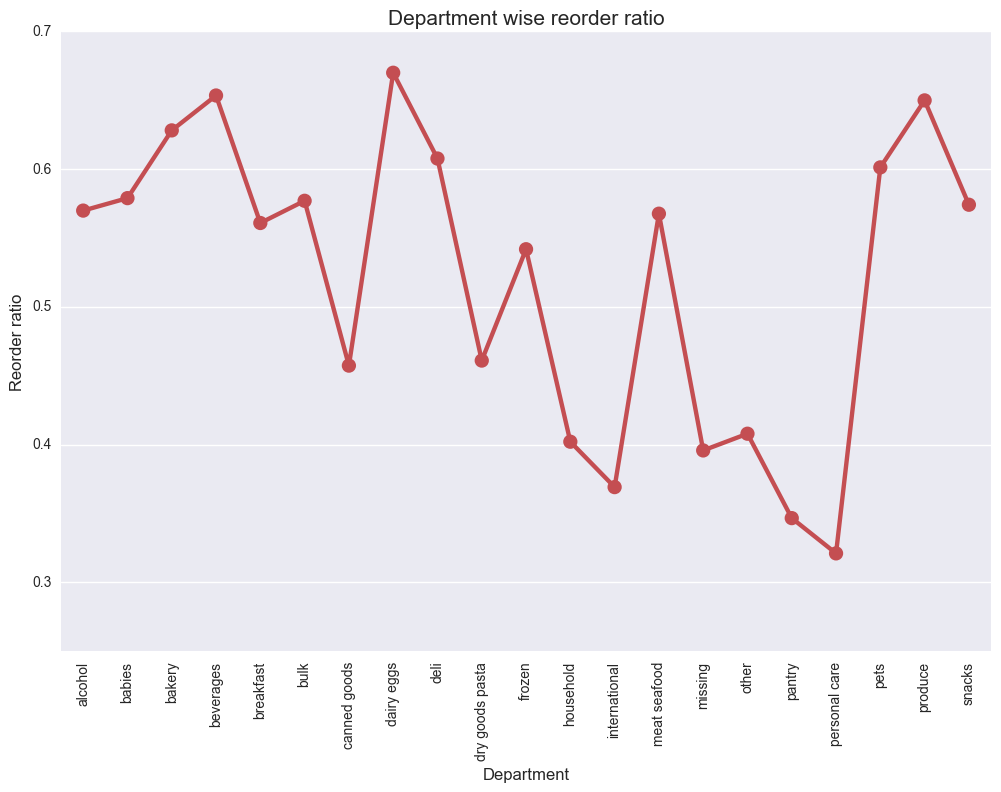

In [166]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

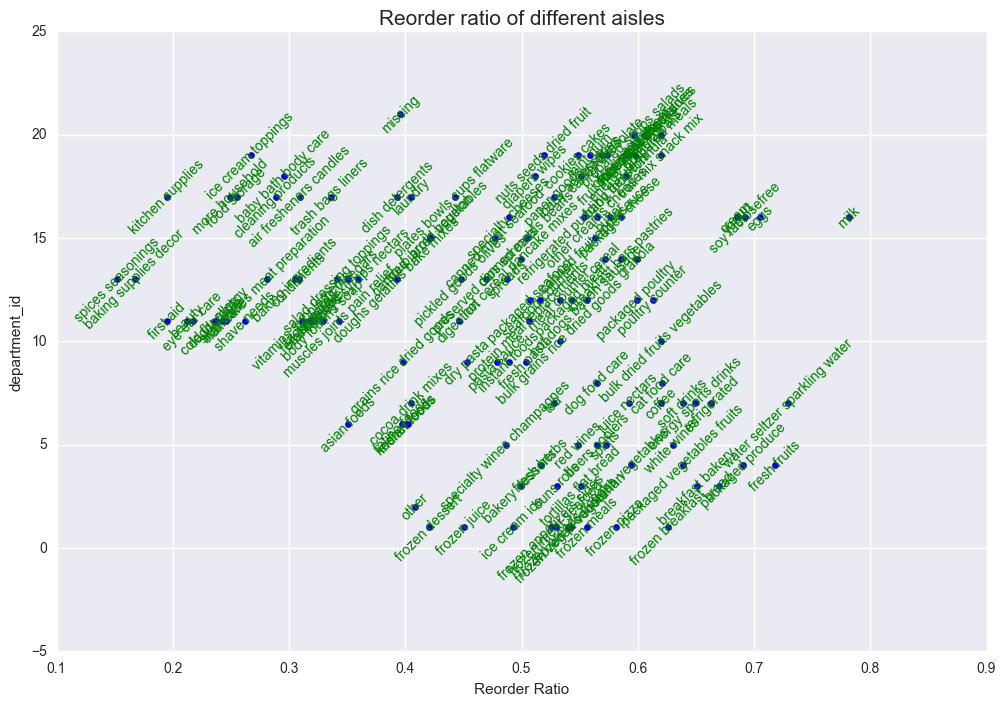

In [168]:
grouped_df = order_products_prior_df.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()

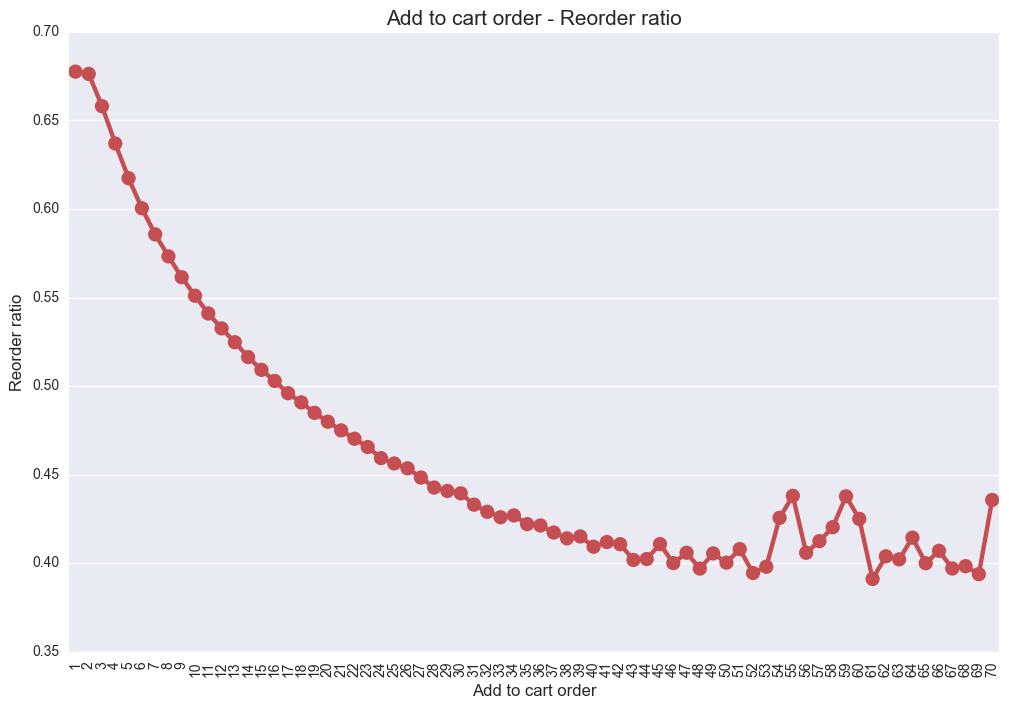

In [169]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].ix[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

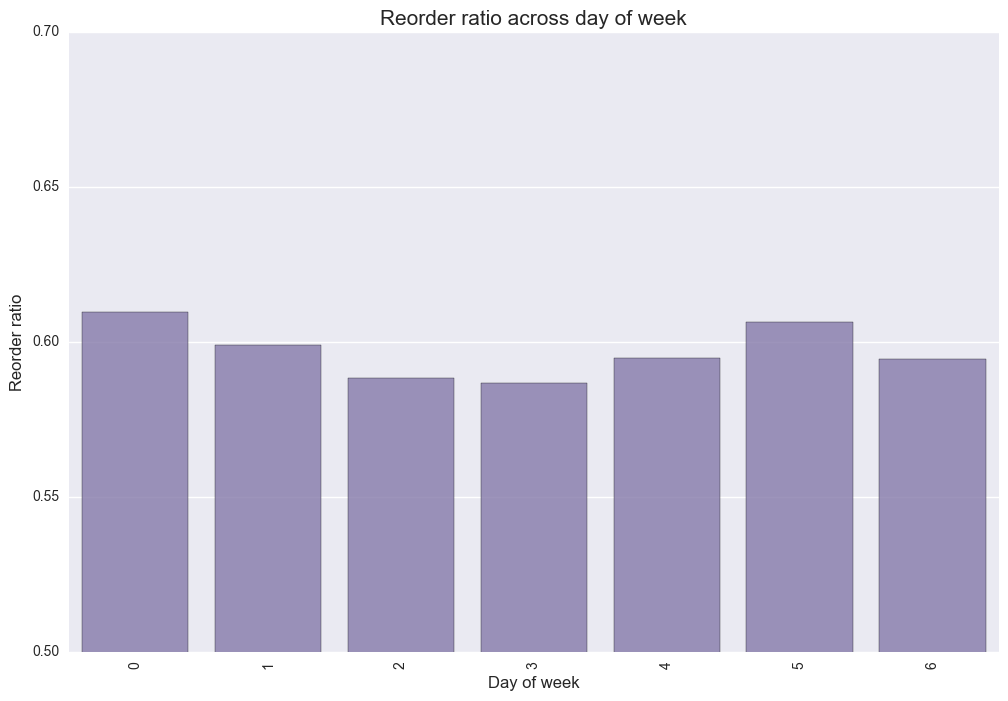

In [170]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

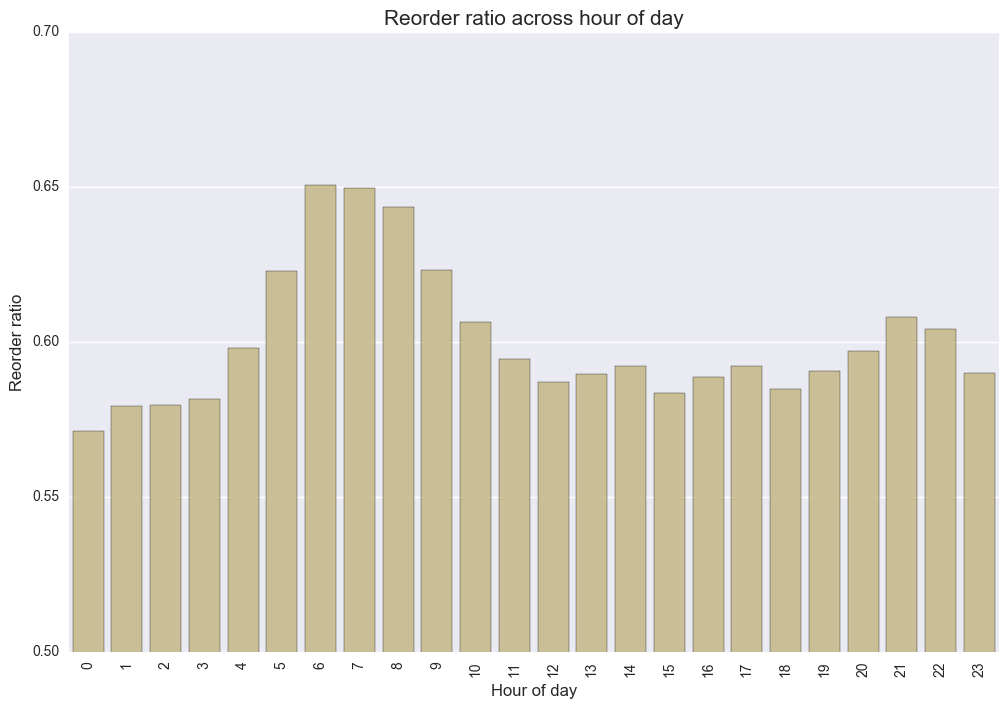

In [171]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

In [172]:
order_products_prior_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,add_to_cart_order_mod
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,1
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,2
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,3
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,4
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,5
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,6
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry,7
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry,8
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,9
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs,1


In [177]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [181]:
orders_df.ix[orders_df.order_id==2]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3355525,2,202279,prior,3,5,9,8.0
